In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z, n):
    sw = {
      1: z**2,
      2: (z-1)**2,
      3: z**2 - 1,
      4: z**2 + 1
   }
    return sw.get(n)

def df(z, n):
    sw = {
      1: 2*z,
      2: 2*z - 2,
      3: 2*z,
      4: 2*z
   }
    return sw.get(n)

titlefract = {
  1: 'Newton Fractal f(x)=Z^2',
  2: 'Newton Fractal f(x)=(Z-1)^2',
  3: 'Newton Fractal f(x)=Z^2-1',
  4: 'Newton Fractal f(x)=Z^2+1'
}   
funtionsroots = {
  1:[0.0, 0.0],
  2:[1.0, 1.0],
  3:[1.0, -1.0],
  4:[-1j, 1j]
} 
def newton_set1(n, z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = funtionsroots.get(n)[0]
    r2 = funtionsroots.get(n)[1]

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z, n)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                    if r1 == r2 :
                      znext = z - 2*f(z, n) / dz # Newton iteration
                    else:
                      znext = z - f(z, n) / dz # Newton iteration   

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(n, titl, z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(n=n,z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title(titl)
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()
    #'Newton Fractal f(x)=Z^2-1'

In [ ]:
#-2.0,2.0,100
def graph(title, n, a, b, c):
  x = np.linspace(a,b,c)
  fig, ax = plt.subplots()
  ax.plot(x,f(x, n))
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.grid(True, which='both')
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('f(x)')

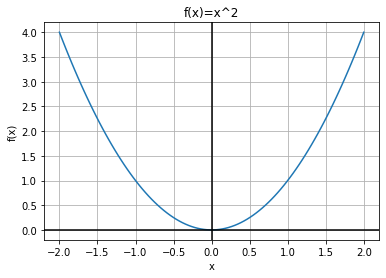

In [ ]:
graph('f(x)=x^2', 1, -2.0, 2.0, 100)

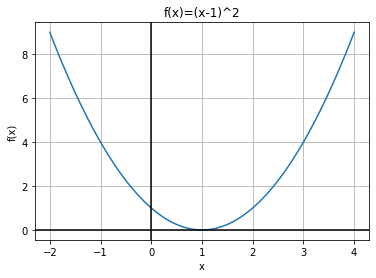

In [ ]:
graph('f(x)=(x-1)^2', 2, -2, 4, 100)

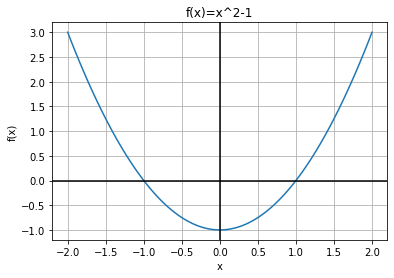

In [ ]:
graph('f(x)=x^2-1', 3, -2.0, 2.0, 100)

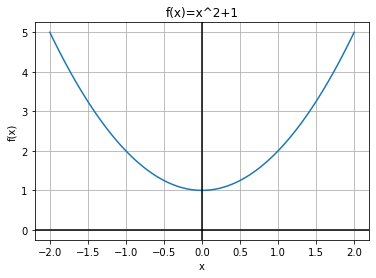

In [ ]:
graph('f(x)=x^2+1', 4, -2.0, 2.0, 100)

Classical method for solving quadratic equations



In [ ]:
def calculateQuadEc(n):
  sw = {
      1: [1,0,0],
      2: None,
      3: [1,0,-1],
      4: [1,0,1]
   }
  if sw.get(n) != None:
    a = sw.get(n)[0]
    b = sw.get(n)[1]
    c = sw.get(n)[2]
    r1 = 0
    r2 = 0
    discriminant = (b**2) - (4*a*c)  
    if discriminant < 0:
      r1 = complex(-b, -1*math.sqrt(abs(discriminant))/(2*a)) 
      r2 = complex(-b, math.sqrt(abs(discriminant))/(2*a))
    else:
      r1 = (-b - math.sqrt(discriminant))/(2*a)  
      r2 = (-b + math.sqrt(discriminant))/(2*a)  
  else:
    r1 = 1.0
    r2 = 1.0
  roots = [r1, r2]
  return roots  

In [ ]:
print(calculateQuadEc(1))
print(calculateQuadEc(2))
print(calculateQuadEc(3))
print(calculateQuadEc(4))

[0.0, 0.0]
[1.0, 1.0]
[-1.0, 1.0]
[-1j, 1j]


Po Shen Loh method for solving quadratic equations


In [ ]:
def calculatePoShenLoh(n):
  sw = {
      1: [0,0],
      2: None,
      3: [0,-1],
      4: [0,1]
   }
  if sw.get(n) != None:
    b = sw.get(n)[0]
    c = sw.get(n)[1]
    r1 = 0
    r2 = 0
    discriminant = (b**2)/4 - c  
    if discriminant < 0:
      r1 = complex(-b/2, -1*math.sqrt(abs(discriminant))) 
      r2 = complex(-b/2, math.sqrt(abs(discriminant)))
    else:
      r1 = (-b/2 - math.sqrt(discriminant))
      r2 = (-b/2 + math.sqrt(discriminant)) 
  else:
    r1 = 1.0
    r2 = 1.0
  roots = [r1, r2]
  return roots 
  #calculatePoShenLoh(4)  

In [ ]:
print(calculatePoShenLoh(1))
print(calculatePoShenLoh(2))
print(calculatePoShenLoh(3))
print(calculatePoShenLoh(4))

[0.0, 0.0]
[1.0, 1.0]
[-1.0, 1.0]
[-1j, 1j]


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


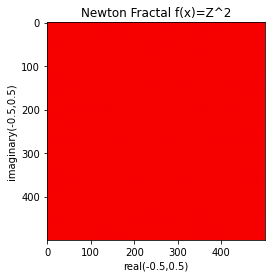

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


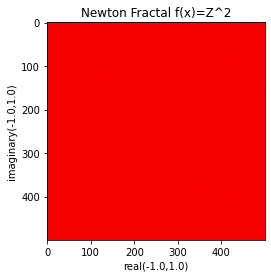

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


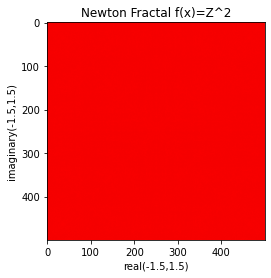

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


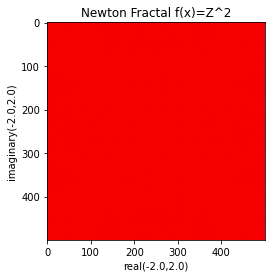

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


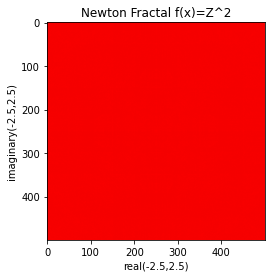

In [ ]:
print("zoom out")
display1(1, titlefract.get(1), zoom=1)
display1(1, titlefract.get(1), zoom=2)
display1(1, titlefract.get(1), zoom=3)
display1(1, titlefract.get(1), zoom=4)
display1(1, titlefract.get(1), zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


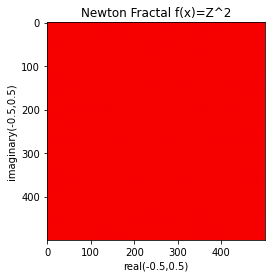

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


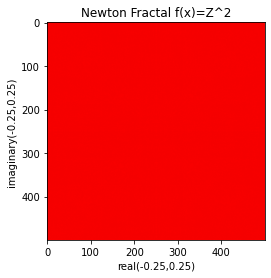

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


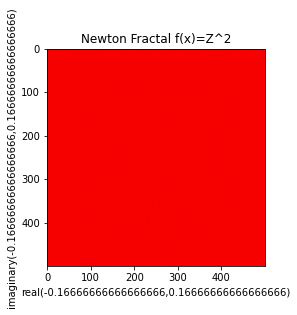

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


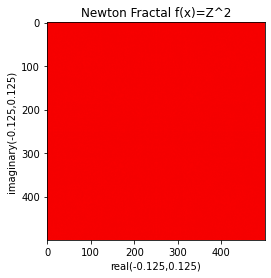

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


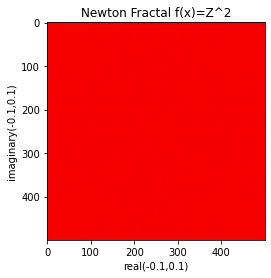

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


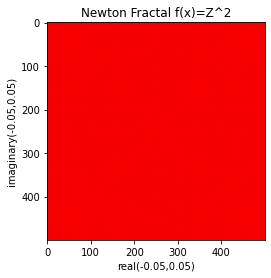

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


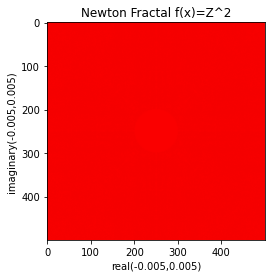

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


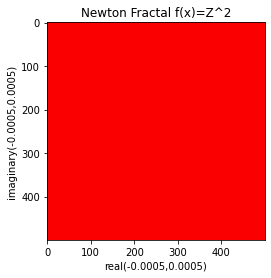

In [ ]:
print("zoom in")
display1(1, titlefract.get(1), zoom=1)
display1(1, titlefract.get(1), zoom=1/2)
display1(1, titlefract.get(1), zoom=1/3)
display1(1, titlefract.get(1), zoom=1/4)
display1(1, titlefract.get(1), zoom=1/5)
display1(1, titlefract.get(1), zoom=1/10)
display1(1, titlefract.get(1), zoom=1/100)
display1(1, titlefract.get(1), zoom=1/1000)

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


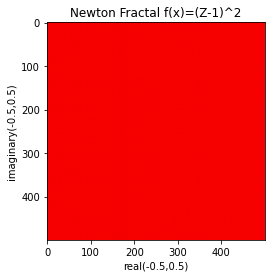

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


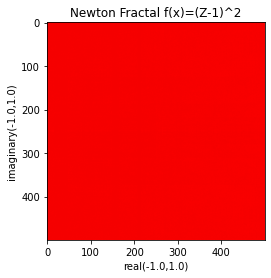

Z region from ( -5.0 , -5.0 ) to ( 5.0 , 5.0 )


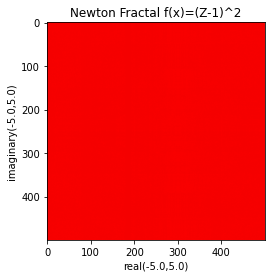

Z region from ( -7.5 , -7.5 ) to ( 7.5 , 7.5 )


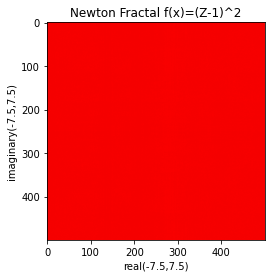

Z region from ( -100000.0 , -100000.0 ) to ( 100000.0 , 100000.0 )


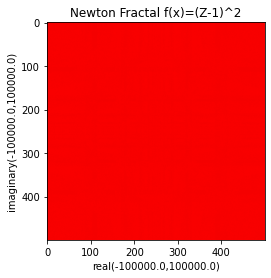

In [ ]:
print("zoom out")
display1(2, titlefract.get(2), zoom=1)
display1(2, titlefract.get(2), zoom=2)
display1(2, titlefract.get(2), zoom=10)
display1(2, titlefract.get(2), zoom=15)
display1(2, titlefract.get(2), zoom=200000)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


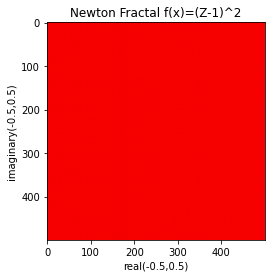

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


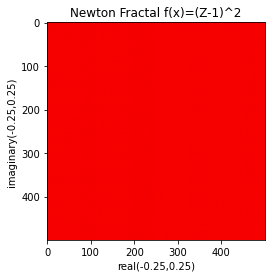

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


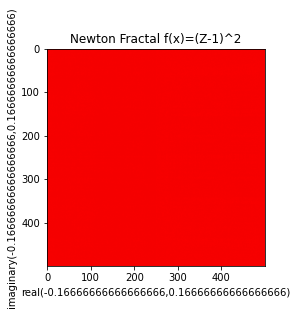

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


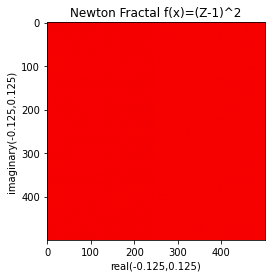

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


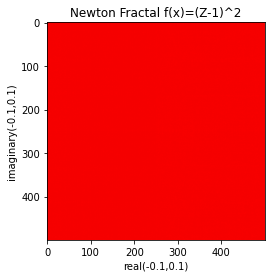

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


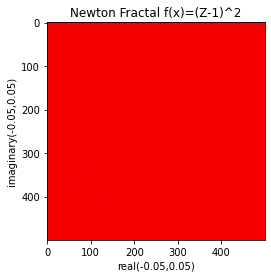

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


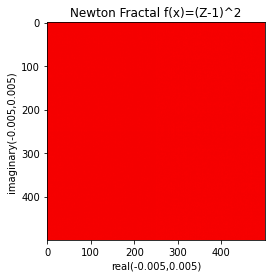

Z region from ( -5e-08 , -5e-08 ) to ( 5e-08 , 5e-08 )


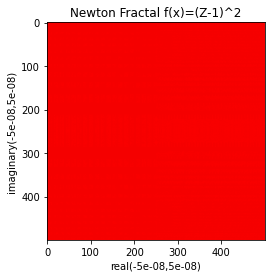

In [ ]:
print("zoom in")
display1(2, titlefract.get(2), zoom=1)
display1(2, titlefract.get(2), zoom=1/2)
display1(2, titlefract.get(2), zoom=1/3)
display1(2, titlefract.get(2), zoom=1/4)
display1(2, titlefract.get(2), zoom=1/5)
display1(2, titlefract.get(2), zoom=1/10)
display1(2, titlefract.get(2), zoom=1/100)
display1(2, titlefract.get(2), zoom=1/10000000)

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


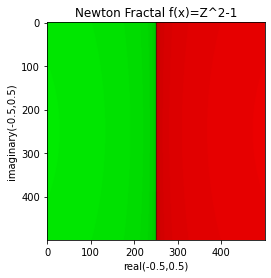

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


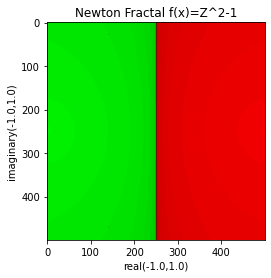

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


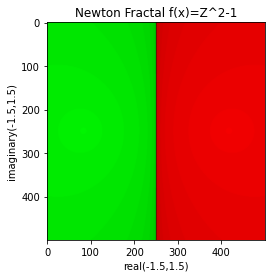

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


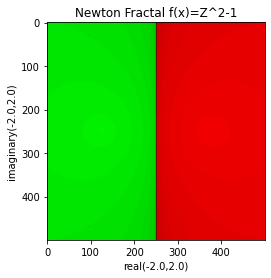

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


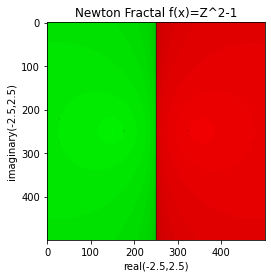

In [ ]:
print("zoom out")
display1(3, titlefract.get(3), zoom=1)
display1(3, titlefract.get(3), zoom=2)
display1(3, titlefract.get(3), zoom=3)
display1(3, titlefract.get(3), zoom=4)
display1(3, titlefract.get(3), zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


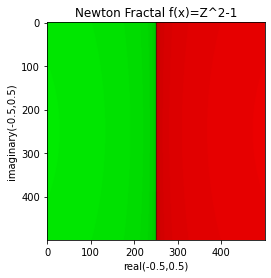

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


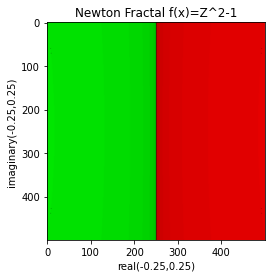

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


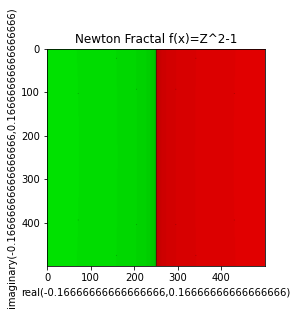

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


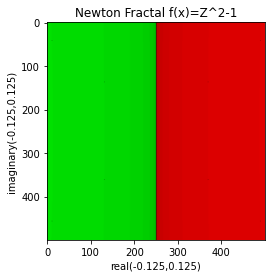

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


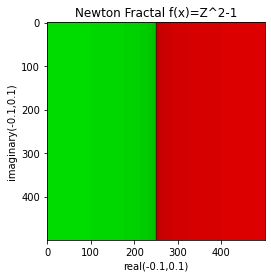

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


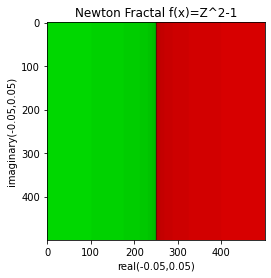

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


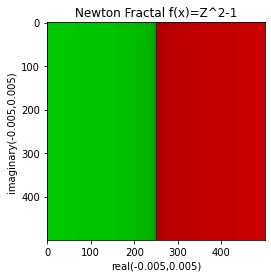

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


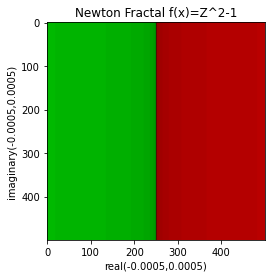

In [ ]:
print("zoom in")
display1(3, titlefract.get(3), zoom=1)
display1(3, titlefract.get(3), zoom=1/2)
display1(3, titlefract.get(3), zoom=1/3)
display1(3, titlefract.get(3), zoom=1/4)
display1(3, titlefract.get(3), zoom=1/5)
display1(3, titlefract.get(3), zoom=1/10)
display1(3, titlefract.get(3), zoom=1/100)
display1(3, titlefract.get(3), zoom=1/1000)

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


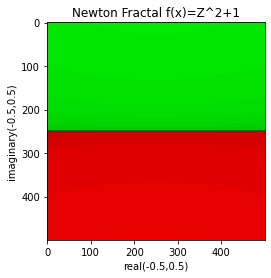

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


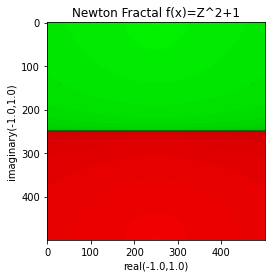

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


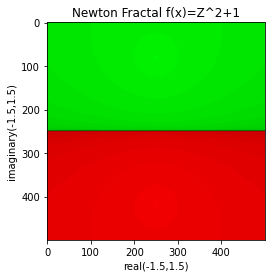

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


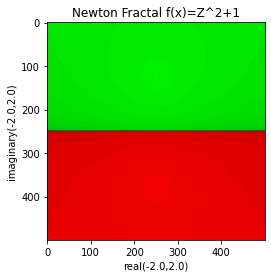

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


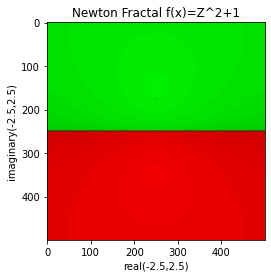

In [ ]:
print("zoom out")
display1(4, titlefract.get(4), zoom=1)
display1(4, titlefract.get(4), zoom=2)
display1(4, titlefract.get(4), zoom=3)
display1(4, titlefract.get(4), zoom=4)
display1(4, titlefract.get(4), zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


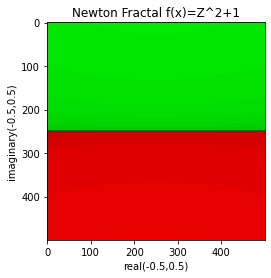

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


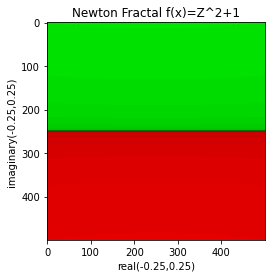

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


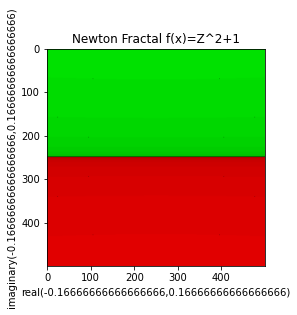

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


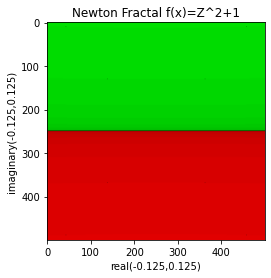

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


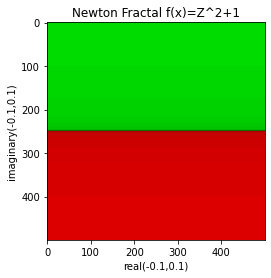

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


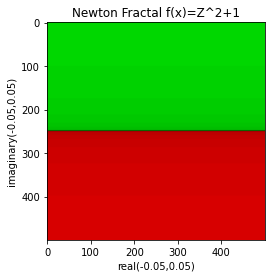

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


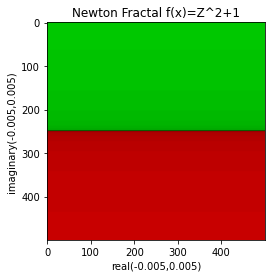

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


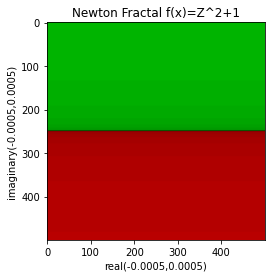

In [ ]:
print("zoom in")
display1(4, titlefract.get(4), zoom=1)
display1(4, titlefract.get(4), zoom=1/2)
display1(4, titlefract.get(4), zoom=1/3)
display1(4, titlefract.get(4), zoom=1/4)
display1(4, titlefract.get(4), zoom=1/5)
display1(4, titlefract.get(4), zoom=1/10)
display1(4, titlefract.get(4), zoom=1/100)
display1(4, titlefract.get(4), zoom=1/1000)

Newton iterates form z=10.0 + 0.0j

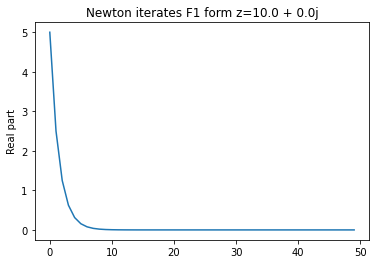

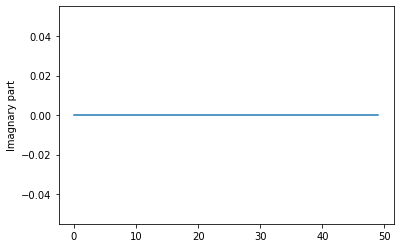

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z, 1)
  z = z - f(z, 1) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F1 form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

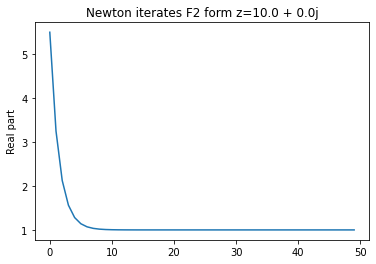

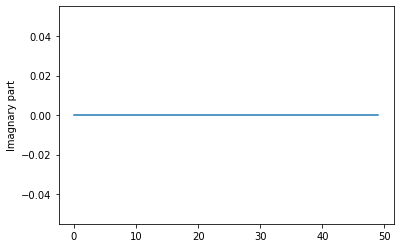

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z, 2)
  z = z - f(z, 2) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F2 form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

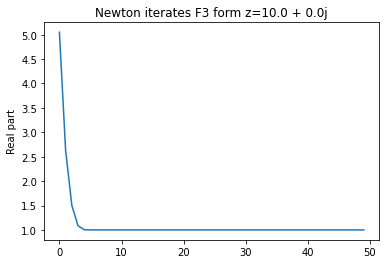

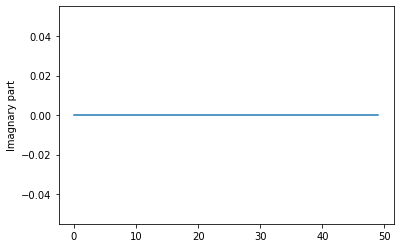

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z, 3)
  z = z - f(z, 3) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F3 form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

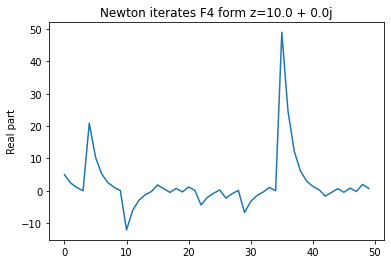

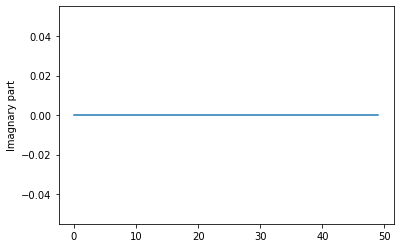

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z, 4)
  z = z - f(z, 4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F4 form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Newton iterates form z=-10.0 + 0.0j

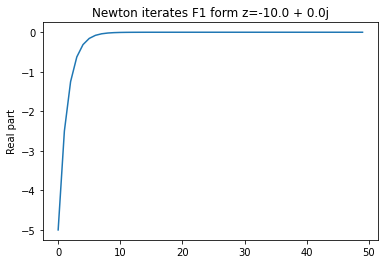

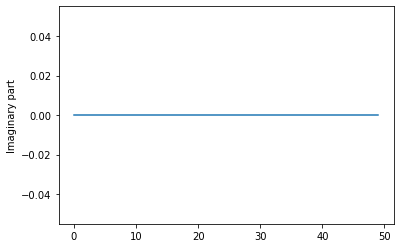

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z, 1)
  z = z - f(z, 1) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F1 form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

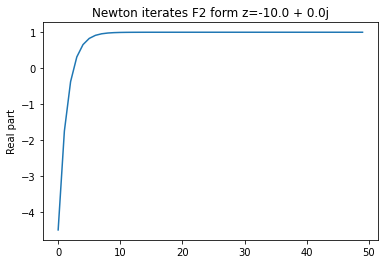

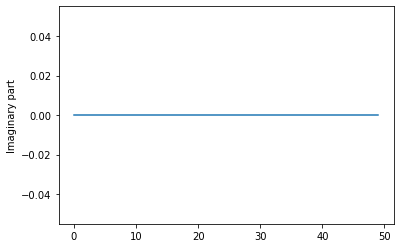

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z, 2)
  z = z - f(z, 2) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F2 form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

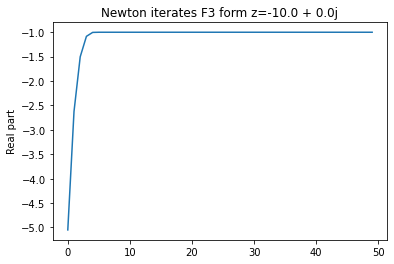

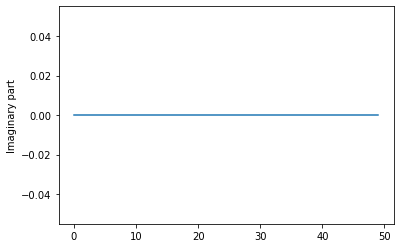

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z, 3)
  z = z - f(z, 3) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F3 form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

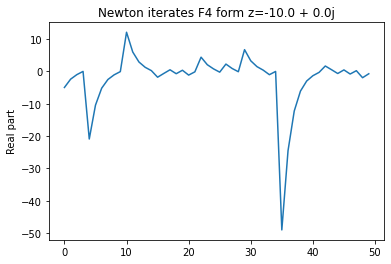

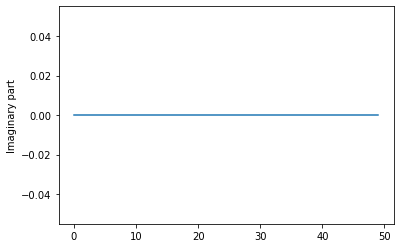

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z, 4)
  z = z - f(z, 4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F4 form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Newton iterates form z=0.0 + 10.0j

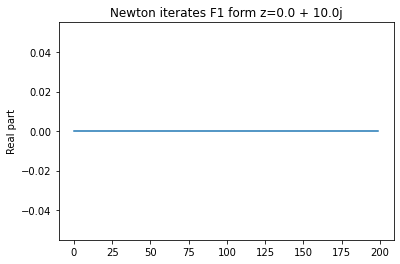

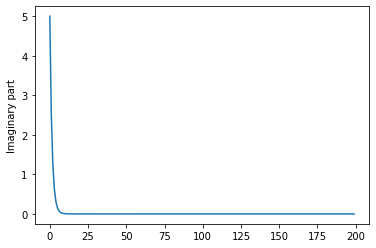

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 1)
  z = z - f(z, 1) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F1 form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

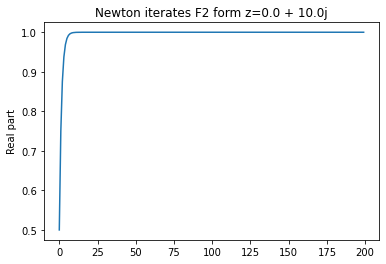

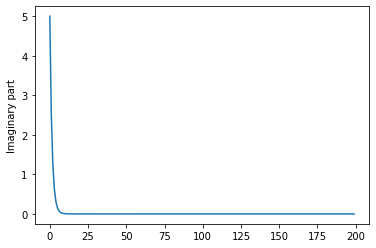

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 2)
  z = z - f(z, 2) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F2 form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

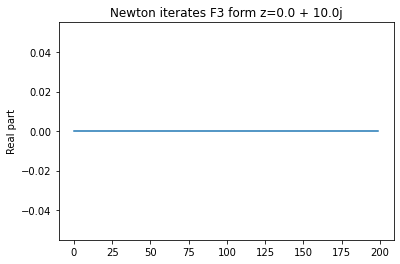

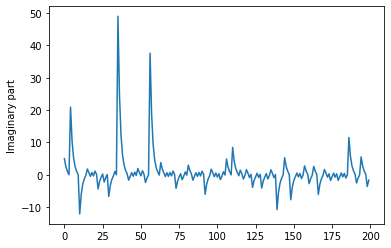

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 3)
  z = z - f(z, 3) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F3 form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

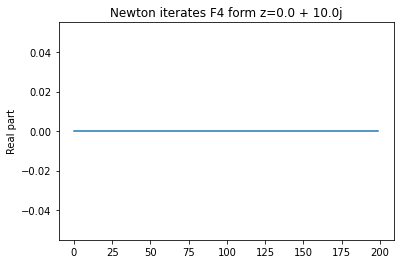

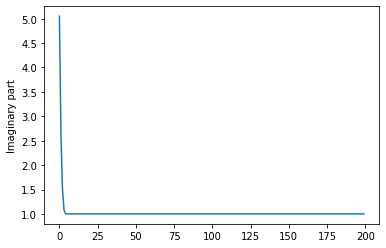

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 4)
  z = z - f(z, 4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F4 form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Newton iterates form z=0.0 - 10.0j

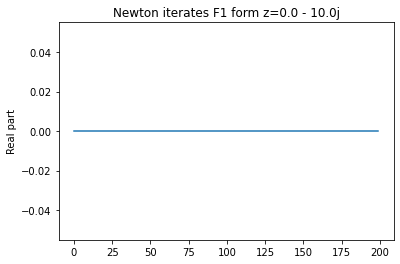

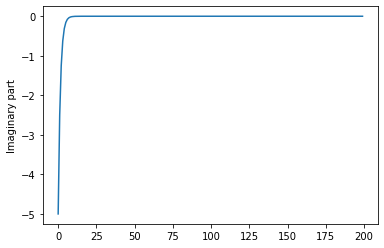

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 1)
  z = z - f(z, 1) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F1 form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

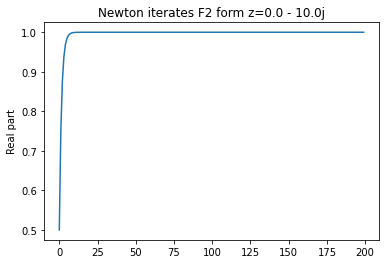

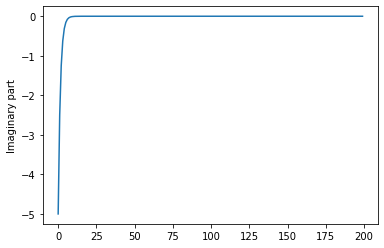

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 2)
  z = z - f(z, 2) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F2 form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

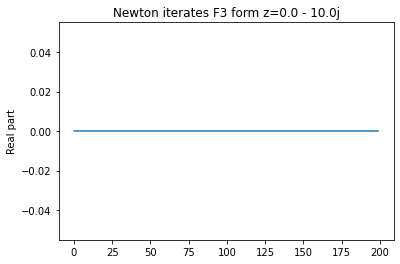

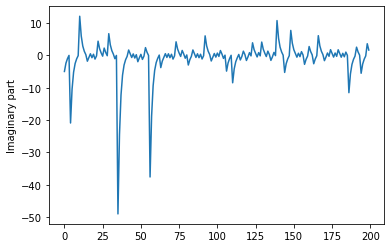

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 3)
  z = z - f(z, 3) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F3 form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

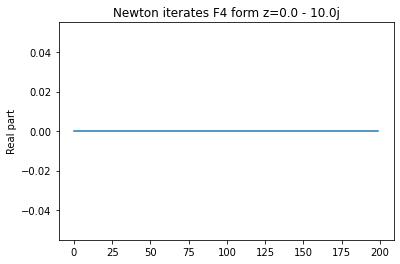

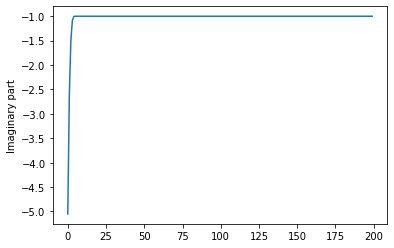

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 4)
  z = z - f(z, 4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates F4 form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Newton iterates form z=0.0 + 0.0j

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 1)
  z = z - f(z, 1) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 2)
  z = z - f(z, 2) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 3)
  z = z - f(z, 3) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z, 4)
  z = z - f(z, 4) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()